Reference: <https://stattrek.com/multiple-regression/regression-equation.aspx?tutorial=reg>

# Liner Regression

In [1]:
from statsmodels.formula.api import ols

In [16]:
# use ols model for linear regression (or sklearn)
# see help for more
# ?ols

# Multiple Regressions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg
from statsmodels.formula.api import ols
import statsmodels.api as sm


Predict test score from IQ and study hours

In [2]:
data = [
[1,	100,	125,	30],
[2	,95,	104,	40],
[3	,92,	110,	25],
[4,	90,	105,	20],
[5,	85,	100,	20],
[6,	80,	100,	20],
[7,	78,	95,	15],
[8,	75,	95,	10],
[9,	72,	85,	0],
[10,	65,	90,	5]]

student = pd.DataFrame(data, columns=['id', 'test score', 'IQ', 'study hours'])
student

,id,test score,IQ,study hours
0,1,100,125,30
1,2,95,104,40
2,3,92,110,25
3,4,90,105,20
4,5,85,100,20
5,6,80,100,20
6,7,78,95,15
7,8,75,95,10
8,9,72,85,0
9,10,65,90,5


In [3]:
# column name having space, use quote function Q("column name") to write formula
model = ols('Q("test score") ~ IQ + Q("study hours")', data = student).fit()
model

In [4]:
model.summary()

/home/trung/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("test score")   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     33.45
Date:                Mon, 15 Feb 2021   Prob (F-statistic):           0.000262
Time:                        13:53:17   Log-Likelihood:                -25.952
No. Observations:                  10   AIC:                             57.90
Df Residuals:                       7   BIC:                             58.81
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           23.1561     15.967      1.450      0.190     -14.600      60.913
IQ                   0.5094      0.181      2.818      0.026       0.082       0.937
Q("study hours")     0.4671      0.172      2.717      0.030       0.061       0.874
==============================================================================
Omnibus:                        0.352   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.839   Jarque-Bera (JB):                0.090
Skew:                          -0.171   Prob(JB):                        0.956
Kurtosis:                       2.687   Cond. No.                     1.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---
<b style='color:red'>key outputs</b>:  
    
- **Regression coefficients**, based on a least-squares criterion.
- **Measures of goodness of fit**, like a coefficient of multiple determination and/or an overall F test.
- **Significance tests** for individual regression coefficients.

In [18]:
# see attributes and methods of this model
# dir(model)

In [19]:
# regression coefficient
model.params

Intercept           23.156141
IQ                   0.509434
Q("study hours")     0.467134
dtype: float64

>How well does our model fit the data?


In [11]:
# look at the coefficient of multiple regression
model.rsquared

0.9052669375237908

95% variance of the dependent variable (Test score) can be predicted from the independent variables (IQ, study hours)

>tests the statistical significance of the independent variables as predictors of the dependent variable.

In [13]:
model.fvalue

33.445918441927

In [12]:
model.f_pvalue

0.00026167095537758063

`fvalue` is big (33.446), `f_pvalue` is small(0.00026 < 0.05) so This indicates that one or both independent variables has explanatory power beyond what would be expected by chance.

> whether a particular independent variable contributes significantly to the regression *after effects of other variables are taken into account*. 

In [9]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
IQ,1.0,893.669733,893.669733,59.512345,0.000115
"Q(""study hours"")",1.0,110.814461,110.814461,7.379492,0.029916
Residual,7.0,105.115806,15.016544,NaN,NaN


In [ ]:
# null hypothesis
# coefficient of IQ is equal to 0 (IQ contributes nothing to the linear relationship)
# coefficient of study hours is equal to 0 (study hours contributes nothing to the linear relationship)

# p_value of IQ < 0.05 so reject null hypothesis about the coefficient of IQ
# p_value of study hours < 0.05 so reject null hypothesis about the coefficient of study hours

This means that IQ contributes significantly to the regression after effects of study hours are taken into account.  
And study hours contribute significantly to the regression after effects of IQ are taken into account.

<b style='color:red'>Note: This analysis omits any consideration of <u>multicollinearity</u>, a topic we will cover in the next lesson. Be aware, however, that it is best practice to assess multicollinearity in the independent variables before testing significance of regression coefficients.</b>

# Dummy Variables

use **`C(column_name)`** to treat a column as categorical in formula

In [21]:
data = [
    [1	, 93	, 125	, "Male"],
    [2	, 86	, 120	, "Female"],
    [3	, 96	, 115	, "Male"],
    [4	, 81	, 110	, "Female"],
    [5	, 92	, 105	, "Male"],
    [6	, 75	, 100	, "Female"],
    [7	, 84	, 95	, "Male"],
    [8	, 77	, 90	, "Female"],
    [9	, 73	, 85	, "Male"],
    [10	, 74	, 80	, "Female"]]
student = pd.DataFrame(data, columns = ['id', 'test_score', 'IQ', 'sex'])
student

,id,test_score,IQ,sex
0,1,93,125,Male
1,2,86,120,Female
2,3,96,115,Male
3,4,81,110,Female
4,5,92,105,Male
5,6,75,100,Female
6,7,84,95,Male
7,8,77,90,Female
8,9,73,85,Male
9,10,74,80,Female


In [22]:
model = ols('test_score ~ IQ + C(sex)', data = student).fit()

model.summary()

/home/trung/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             test_score   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     14.94
Date:                Mon, 15 Feb 2021   Prob (F-statistic):            0.00298
Time:                        15:24:45   Log-Likelihood:                -26.713
No. Observations:                  10   AIC:                             59.43
Df Residuals:                       7   BIC:                             60.33
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         38.6000      9.535      4.048      0.005      16.052      61.148
C(sex)[T.Male]     7.0000      2.686      2.606      0.035       0.649      13.351
IQ                 0.4000      0.094      4.278      0.004       0.179       0.621
==============================================================================
Omnibus:                        0.543   Durbin-Watson:                   2.990
Prob(Omnibus):                  0.762   Jarque-Bera (JB):                0.555
Skew:                          -0.309   Prob(JB):                        0.758
Kurtosis:                       2.025   Cond. No.                         746.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**regression coefficient**

In [23]:
model.params

Intercept         38.6
C(sex)[T.Male]     7.0
IQ                 0.4
dtype: float64

**coefficient of multiple Determination**
>How well does our model fit the data?

In [24]:
model.rsquared

0.8102031322685685

81% variance of the dependent variable(Test score) can be explained by the independent variables (IQ, Sex)

**Multicollinearity**  
At this point, we'd like to assess the relative importance our independent variables. We do this by testing the statistical significance of regression coefficients.

Before we conduct those tests, however, we need to assess multicollinearity between independent variables. If multicollinearity is high, significance tests on regression coefficient can be misleading. But if multicollinearity is low, the same tests can be informative.


 
To measure multicollinearity for this problem, we can try to predict IQ based on Gender. That is, we regress IQ against Gender. The resulting coefficient of multiple determination (R2k) is an indicator of multicollinearity. When R2k is greater than 0.75, multicollinearity is a problem.

For this problem, R2k was very small - only 0.03. Given this result, we can proceed with statistical analysis of our independent variables.

Significance of Regression Coefficients
With multiple regression, there is more than one independent variable; so it is natural to ask whether a particular independent variable contributes significantly to the regression after effects of other variables are taken into account. The answer to this question can be found in the regression coefficients table:


The regression coefficients table shows the following information for each coefficient: its value, its standard error, a t-statistic, and the significance of the t-statistic. In this example, the t-statistics for IQ and gender are both statistically significant at the 0.05 level. This means that IQ predicts test score beyond chance levels, even after the effect of gender is taken into account. And gender predicts test score beyond chance levels, even after the effect of IQ is taken into account.

The regression coefficient for gender provides a measure of the difference between the group identified by the dummy variable (males) and the group that serves as a reference (females). Here, the regression coefficient for gender is 7. This suggests that, after effects of IQ are taken into account, males will score 7 points higher on the test than the reference group (females). And, because the regression coefficient for gender is statistically significant, we interpret this difference as a real effect - not a chance artifact.













 

**Significance of Regression Coefficients**


>e; so it is natural to ask whether a particular independent variable contributes significantly to the regression **after effects of other variables are taken into account**. 

# Interaction

**Reference**: <https://stattrek.com/multiple-regression/interaction.aspx?tutorial=reg>

In [3]:
data = [
[90,0	,0],
[88,20	,0],
[85,40	,0],
[83,60	,0],
[88,0	,1],
[72,20	,1],
[62,40	,1],
[43,60	,1]]


study = pd.DataFrame(data, columns = ['Anxiety', 'Dose', 'Gender'])

study

,Anxiety,Dose,Gender
0,90,0,0
1,88,20,0
2,85,40,0
3,83,60,0
4,88,0,1
5,72,20,1
6,62,40,1
7,43,60,1


## Interaction plot

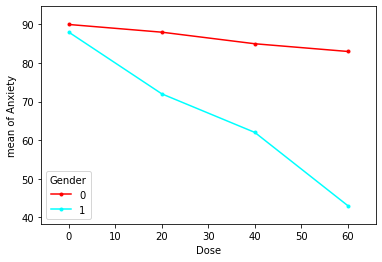

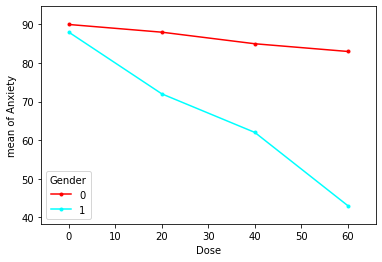

In [8]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(study['Dose'], study['Gender'], study['Anxiety'])

Here, the lines are not parallel. The line for women is steeper. This suggests a possible interaction effect, based on gender. The plot tells us that the drug reduces anxiety more effectively for women than for men. But is the reduction significant? To answer that question, we need to conduct a statistical test.

## Without interaction

In [5]:
model = ols('Anxiety ~ Dose + Gender', data = study).fit()
model.summary()

/home/trung/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Anxiety   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     10.10
Date:                Wed, 17 Feb 2021   Prob (F-statistic):             0.0175
Time:                        12:36:26   Log-Likelihood:                -26.792
No. Observations:                   8   AIC:                             59.58
Df Residuals:                       5   BIC:                             59.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.1750      6.006     16.512      0.000      83.736     114.614
Dose          -0.4225      0.138     -3.066      0.028      -0.777      -0.068
Gender       -20.2500      6.162     -3.286      0.022     -36.090      -4.410
==============================================================================
Omnibus:                        0.465   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.793   Jarque-Bera (JB):                0.467
Skew:                          -0.165   Prob(JB):                        0.792
Kurtosis:                       1.863   Cond. No.                         90.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---
**Analysis**:  
Without interaction, both Dose and Gender are statistically significant at the 0.05 significant level.  
R<sup>2</sup> is 0.802

## With interaction

In [6]:
model = ols('Anxiety ~ Dose + Gender + Dose * Gender', data = study).fit()
model.summary()

/home/trung/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Anxiety   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     184.9
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           9.58e-05
Time:                        12:39:41   Log-Likelihood:                -13.503
No. Observations:                   8   AIC:                             35.01
Df Residuals:                       4   BIC:                             35.32
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      90.1000      1.548     58.190      0.000      85.801      94.399
Dose           -0.1200      0.041     -2.900      0.044      -0.235      -0.005
Gender         -2.1000      2.190     -0.959      0.392      -8.180       3.980
Dose:Gender    -0.6050      0.059    -10.338      0.000      -0.767      -0.443
==============================================================================
Omnibus:                        6.911   Durbin-Watson:                   3.171
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                1.962
Skew:                           1.130   Prob(JB):                        0.375
Kurtosis:                       3.885   Cond. No.                         164.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---
**Analysis**:  
We see that the interaction between Dose and Gender is statistically significant at the 0.01 significant level. When we examine the main effect, we notice that Dose is statistically significant, but Gender is not. And R<sup>2</sup> is 0.993

## How to interpret the result?

> Does the interaction term contribute in a meaningful way to the explanatory power of the equation?

**How to decide to use the interaction or not**:  
- Compare R<sup>2</sup> with and without the interaction term. If R<sup>2</sup> is much bigger with the interaction term, the interaction is definitely important
- Access the statistically significant level of the interaction term. If it is significant then the interaction is probably important

## Pros and Cons

**Pros**:
- Better fit if the interaction is statistically significant.
**Cons**:
- It is harder to interpret the relative importance of independent variables. When an interaction effect exists, the effect of one independent variable depends on the value(s) of one or more other independent variables.

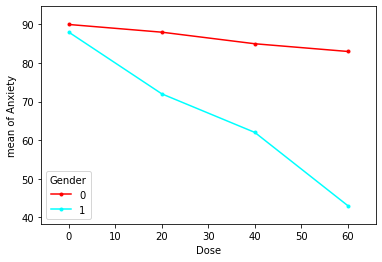

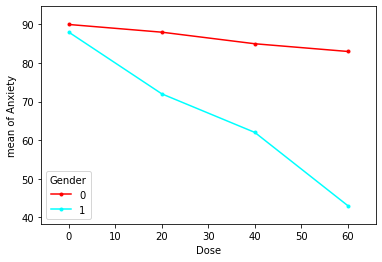

In [10]:
interaction_plot(study['Dose'], study['Gender'], study['Anxiety'])

For males, drug dosage has the minimal effect on anxiety. For females, the effect is dramatic. The effect of drug dose cannot be understood without accounting for the gender of the person receiving the medication.

<b style='color:red'><u>Bottom line</u>: When the interaction is statistically significant, try not to understand the main effect in isolation</b>